# Correlation figure for twins activation maps

- grab activation maps
- Load pedigree
- stack in 3 dictionary :
    - MZ twins: Twin1, Twin2
    - DZ twins: Twin1, Twin2
    - Unrelated subject: S1, S2


In [1]:
import os
import glob
import random
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd
import multiprocessing 
import collections

In [2]:
%matplotlib inline

In [3]:
#custom function for key sorting element
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [4]:
# Set path
path_root = '/media/yassine/data_disk/Drive/HCP2/'
path_h2r = os.path.join(path_root,'Solar_heritability/HCP_subtype/')
path_root_spm = '/media/yassine/data_disk/data/HCP/SPM/hcp_emotion_activation_maps_17-Jun-2017'

In [5]:
# Set task , trial and sbt
#task_names = ['emotion','social','relational','motor','gambling','wm','language']
task_names = 'emotion'
nb_sbt= 5
list_trial = os.listdir(os.path.join(path_root_spm,'group_maps'))
list_trial= [ll.split('.')[0] for ll in list_trial]

In [6]:
list_trial=list_trial[::-1]
list_trial

['fear_vs_neut', 'fear', 'neut']

In [28]:
pd.read_csv(pheno_file)

,Subject,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean,Age_in_Yrs,Gender,Twin_Stat,...,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10
0,HCP100206,0.083053,0.083053,0.088776,0.088776,0.085915,0.085915,27.0,1.0,NotTwin,...,-0.344595,1.283574,0.052662,1.436342,0.706008,-0.510366,1.975280,1.294323,-0.025888,-0.203825
1,HCP100307,0.102121,0.102121,0.090372,0.090372,0.096246,0.096246,27.0,2.0,Twin,...,-0.639736,0.522789,-0.952467,-0.713226,-0.559144,-0.140952,-0.703027,0.229112,0.097581,-0.444702
2,HCP100408,0.113475,0.113475,0.133985,0.133985,0.123730,0.123730,33.0,1.0,Twin,...,1.173656,0.092160,-0.521888,-0.034026,-0.109229,0.221359,-0.589268,0.357483,-0.039443,0.095913
3,HCP100610,0.158172,0.158172,0.174523,0.166174,0.162173,0.166348,27.0,1.0,Twin,...,0.891096,-0.361182,-0.881930,-0.386394,-0.575076,-0.197974,0.203063,0.618868,0.491618,1.343114
4,HCP101006,0.132186,0.132186,0.117849,0.117849,0.125018,0.125018,35.0,2.0,Twin,...,0.608381,0.037740,0.055531,-0.883482,-0.383174,-0.309221,-0.753780,-1.183212,0.031989,-0.494022
5,HCP101107,0.234012,0.079017,0.126360,0.104782,0.091899,0.180186,22.0,1.0,NotTwin,...,-0.922800,0.202094,0.163451,0.227207,1.339868,0.352401,-0.277470,0.305663,-0.032826,-0.151062
6,HCP101309,0.079122,0.079122,0.089320,0.080052,0.079587,0.084221,29.0,1.0,NotTwin,...,-0.921495,-1.054605,-0.307215,-0.783720,-0.312067,0.398342,-0.668765,-0.523430,-0.159725,0.312902
7,HCP101410,0.147346,0.147346,0.169971,0.169971,0.158659,0.158659,29.0,1.0,Twin,...,0.326811,-0.213178,-0.409235,0.039428,-0.441181,0.390266,-0.376479,0.087171,-0.504826,-0.082847
8,HCP101915,0.079037,0.079037,0.101493,0.101493,0.090265,0.090265,35.0,2.0,NotTwin,...,-0.859532,-0.837023,-0.057703,-0.375249,-0.365499,1.175929,-0.647998,-0.660448,-0.344353,1.135137
9,HCP102008,0.143513,0.143513,0.152666,0.152666,0.148090,0.148090,24.0,1.0,NotTwin,...,0.471527,-0.101898,0.151105,0.954806,0.491990,0.656850,0.058323,1.136948,0.198473,-0.027216


In [29]:
# get pheno file
pheno_file = os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_{}_raw.csv".format(task_names))
pedig_df = pd.read_csv(pheno_file).filter(regex = r'(Subject|ID|Unnamed: 0|Zygosity|Twin_Stat|Gender)').rename(columns={'Unnamed: 0':'ID','Subject':'ID'})

In [30]:
pedig_df.head()

,ID,Gender,Twin_Stat,Zygosity,Mother_ID
0,HCP100206,1.0,NotTwin,NotTwin,56037.0
1,HCP100307,2.0,Twin,NotMZ,51488.0
2,HCP100408,1.0,Twin,MZ,51730.0
3,HCP100610,1.0,Twin,NotMZ,52813.0
4,HCP101006,2.0,Twin,MZ,51283.0


In [31]:
# MZ
MZ_df = pedig_df.loc[pedig_df['Zygosity'] == 'MZ']
mask_mz = [True if np.sum(MZ_df.Mother_ID == row.Mother_ID) == 2 else False for ind, row in MZ_df.iterrows()]
MZ_df_clean = MZ_df[mask_mz]
MZ_df_clean.count()

ID           148
Gender       148
Twin_Stat    148
Zygosity     148
Mother_ID    148
dtype: int64

In [32]:
# DZ
DZ_df = pedig_df.loc[pedig_df['Zygosity'] == 'NotMZ']
mask_dz = [True if np.sum(DZ_df.Mother_ID == row.Mother_ID) == 2 else False for ind, row in DZ_df.iterrows()]
DZ_df_clean = DZ_df[mask_dz]
DZ_df_clean.count()

ID           142
Gender       142
Twin_Stat    142
Zygosity     142
Mother_ID    142
dtype: int64

In [33]:
# Sib
Sib_df = pedig_df.loc[pedig_df['Zygosity'] == 'NotTwin']
mask_sib = [True if np.sum(Sib_df.Mother_ID == row.Mother_ID ) == 2 else False for ind, row in Sib_df.iterrows()]
Sib_df_clean = Sib_df[mask_sib]
Sib_df_clean.count()

ID           124
Gender       124
Twin_Stat    124
Zygosity     124
Mother_ID    124
dtype: int64

In [34]:
# # re-arrange Sib subject by pair of sibling
# list_Sib_pair=[Sib_df_clean[Sib_df_clean.Mother_ID == row.Mother_ID] 
#                for ind, row in Sib_df.iterrows() 
#                if not Sib_df_clean[Sib_df_clean.Mother_ID == row.Mother_ID].empty]
# list_Sib_pair=[list_Sib_pair[ii] for ii in range(int(len(list_Sib_pair)/2))]
# len(list_Sib_pair)

In [35]:
# Unr
UnR_df = pedig_df.loc[pedig_df['Zygosity'] == 'NotTwin']
mask_UnR = [True if np.sum(UnR_df.Mother_ID == row.Mother_ID) == 1 else False for ind, row in UnR_df.iterrows()]
UnR_df_clean = UnR_df[mask_UnR]
UnR_df_clean.count()

ID           210
Gender       210
Twin_Stat    210
Zygosity     210
Mother_ID    210
dtype: int64

In [36]:
#create a fake pair of mother id for unrelated person
samp_ = random.sample(range(1, 1000), int(len(UnR_df_clean)/2))
samp = samp_+samp_
UnR_df_clean.loc[:,'Mother_ID']=samp
UnR_df_clean.loc[:,'Zygosity']=['UnR']* int(len(UnR_df_clean))

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Fill dictionary

In [37]:
#initiate empty dictionary
dict_all = collections.namedtuple('dict_all', ['task','ID','trial','zygos','T1','T2','mask'])

In [44]:
dict_all_list =list()
mask  = '/media/yassine/data_disk/data/HCP/SPM/func_mask_average_stereonl.nii.gz'
list_dict = [MZ_df_clean,DZ_df_clean,Sib_df_clean,UnR_df_clean]


for trial in list_trial:
    if '_vs_'in trial:
        trial = 'contrast_' + trial
    for dict_ in list_dict:
        zygos = dict_.Zygosity.iloc[0]
        for ID in dict_.Mother_ID.unique():
            pair1 = dict_[dict_.Mother_ID == ID].ID.get_values()[0]
            pair2 = dict_[dict_.Mother_ID == ID].ID.get_values()[1]
            
            spm_path1 = glob.glob(os.path.join(path_root_spm,
                                               'spm_maps',
                                               pair1,
                                               'all_runs',
                                               'spm_{}.*'.format(trial)))
            spm_path2 = glob.glob(os.path.join(path_root_spm,
                                               'spm_maps',
                                               pair2,
                                               'all_runs',
                                               'spm_{}.*'.format(trial)))
            if spm_path1 and spm_path2 :

                dict_all_list.append(dict_all(ID=ID,
                                              task = task_names,
                                              zygos = zygos,
                                              trial = trial,
                                              T1 = spm_path1,
                                              T2 = spm_path2,
                                              mask = mask))
                continue        
            elif not spm_path1:
                print("subject {} doesnt have a file for trial {}".format(pair1,trial))
            elif not spm_path2:
                print("subject {} doesnt have a file for trial {}".format(pair2,trial))

subject HCP115825 doesnt have a file for trial contrast_fear_vs_neut
subject HCP849264 doesnt have a file for trial contrast_fear_vs_neut
subject HCP181636 doesnt have a file for trial contrast_fear_vs_neut
subject HCP196750 doesnt have a file for trial contrast_fear_vs_neut
subject HCP188549 doesnt have a file for trial contrast_fear_vs_neut
subject HCP557857 doesnt have a file for trial contrast_fear_vs_neut
subject HCP927359 doesnt have a file for trial contrast_fear_vs_neut
subject HCP101107 doesnt have a file for trial contrast_fear_vs_neut
subject HCP130821 doesnt have a file for trial contrast_fear_vs_neut
subject HCP207123 doesnt have a file for trial contrast_fear_vs_neut
subject HCP173637 doesnt have a file for trial contrast_fear_vs_neut
subject HCP208428 doesnt have a file for trial contrast_fear_vs_neut
subject HCP304020 doesnt have a file for trial contrast_fear_vs_neut
subject HCP873968 doesnt have a file for trial contrast_fear_vs_neut
subject HCP110613 doesnt have a fi

In [45]:
# Deal with minc being all weird
def roll_all(arr):
    tmp = arr
    for i in np.arange(len(arr.shape)):
        tmp = np.rollaxis(tmp, -1, i)
    return tmp

In [46]:
def run_corr(x):
    results =dict()
    m_img = nib.load(x.mask)
    mask_data = m_img.get_data()
    mask = mask_data != 0
        
    for trial in list_trial:
        if '_vs_'in x.trial:
            trial = 'contrast_' + trial

        if x.trial == trial:
            tmp_1 = nib.load(x.T1[0]).get_data()
            if x.T1[0].split('.')[-2] == 'mnc':
                tmp_1 = roll_all(tmp_1)
            tmp_2 = nib.load(x.T2[0]).get_data()
            if x.T2[0].split('.')[-2] == 'mnc':
                tmp_2 = roll_all(tmp_2)
            vol1 = tmp_1[mask]
            vol2 = tmp_2[mask]
            corr  = np.corrcoef(vol1,vol2)
            results = {'task':x.task,
                       'zygos':x.zygos,
                       'trial_name' : x.trial,
                       'corr' : corr,
                       'ID' : x.ID
                        }
    return results

In [47]:
# run parralel process
pool = multiprocessing.Pool()
res_= pool.map(run_corr,dict_all_list)

In [48]:
# grab each trial  result
result_final = []
result_ = list()

for trial in list_trial:
    if '_vs_'in trial:
        trial = 'contrast_' + trial
    for zy in ['MZ','NotMZ','NotTwin','UnR']:
        corr_list = [x['corr'][0,1] for x in res_ if x['trial_name'] == trial and x['zygos'] == zy ]
        result_dict =  {'task': task_names,
                        'trial_name' : trial,
                        'zygos':zy,
                        'coor_list' : corr_list,
                        'mean_corr' : np.mean(corr_list),
                        'std_corr'  : np.std(corr_list)}
        result_.append(result_dict)
        # grab trial corr and std
tmp_=[[res['task'],res['trial_name'],res['zygos'], res['mean_corr'], res['std_corr']] for res in result_]
result_final = result_final + tmp_

In [49]:
corr_df = pd.DataFrame(result_final,columns=['task','trial','zygosity','corr','std'])
corr_df

,task,trial,zygosity,corr,std
0,emotion,contrast_fear_vs_neut,MZ,0.327372,0.112926
1,emotion,contrast_fear_vs_neut,NotMZ,0.274706,0.101232
2,emotion,contrast_fear_vs_neut,NotTwin,0.258603,0.102824
3,emotion,contrast_fear_vs_neut,UnR,0.246363,0.092080
4,emotion,fear,MZ,0.380092,0.093967
5,emotion,fear,NotMZ,0.350246,0.096998
6,emotion,fear,NotTwin,0.346472,0.099234
7,emotion,fear,UnR,0.314345,0.081904
8,emotion,neut,MZ,0.323998,0.099043
9,emotion,neut,NotMZ,0.285133,0.119532


In [50]:
#save to csv
corr_df.to_csv(os.path.join(path_root_spm,'corr_{}.csv'.format(task_names)))

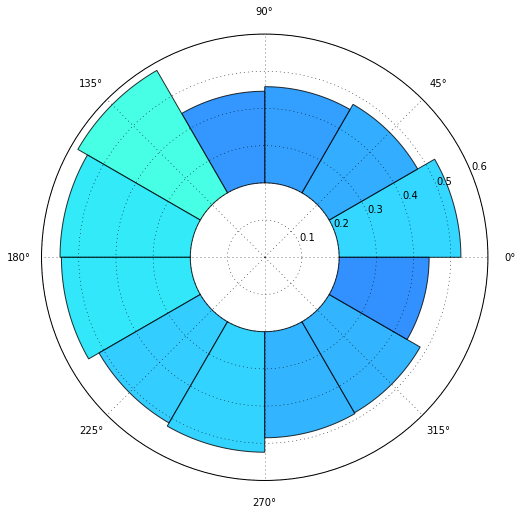

In [51]:
# main fig h2r
N = corr_df['corr'].shape[0]
bottom = 0.2
max_height = 1

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
#radii = max_height*np.random.rand(N)
radii = corr_df['corr']
width = (2*np.pi) / N
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r))
    bar.set_alpha(0.8)
    bar.yerr= corr_df['std']
f.savefig(os.path.join(path_root_spm,'corr_{}.svg'.format(task_names)))